In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from aaaa.aaa.aa import aaa

ModuleNotFoundError: No module named 'aaaa'

# Zadanie 
Trzej łucznicy - Patryk, Jacek i Aleksander biorą udział w konkursie strzeleckim. Pierścienie na tarczy mają wartości punktacji od 1 do 10 (10 to najwyższy wynik). Każdy uczestnik strzela 6 strzał, zdobywając punkty:

Patryk - 5, 4, 4, 3, 9, 4 

Jacek - 4, 8, 7, 5, 1, 5 

Aleksander - 9, 9, 8, 10, 4, 10 

Na podstawie powyższych wyników chcielibyśmy wiedzieć, kto jest najlepszym łucznikiem. Innymi słowy, nasza hipoteza zerowa oznacza, że środnie we wszystkich populacjach są jednakowe.

In [2]:
data = pd.DataFrame({'Score': [5,4,4,3,9,4,4,8,7,5,1,5,9,8,8,10,5,10],
                     'Archer': ['Pat','Pat','Pat','Pat','Pat','Pat',
                                'Jack','Jack','Jack','Jack','Jack','Jack', 
                                'Alex','Alex','Alex','Alex','Alex','Alex']})

# Wykonujemy test ANOVA

In [3]:
f, p = stats.f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 4.999999999999998
P value: 0.021683749320078414 



## Wniosek
Ponieważ, odrzucamy hipotezę zerową o równości średnich zastanawiamy się czy któryś ze strzelców nie radzi sobie istotnie lepiej.

# Wykonujemy analizę post hoc

In [6]:
multiComp = MultiComparison(data['Score'],data['Archer'])
hsd = multiComp.tukeyhsd()

Należy również zauważyć, że funkcja <tt>tukeyhsd()</tt> ma parametr alfa, którego nie określamy wyraźnie, ponieważ jesteśmy zadowoleni ze swojej wartości domyślnej ($\alpha = 0.05$).

In [7]:
print((hsd.summary()))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Alex   Jack  -3.3333 0.0435 -6.5755 -0.0911   True
  Alex    Pat     -3.5 0.0337 -6.7422 -0.2578   True
  Jack    Pat  -0.1667    0.9 -3.4089  3.0755  False
----------------------------------------------------


In [8]:
print(np.mean(data[data['Archer'] == 'Pat'].Score))
print(np.mean(data[data['Archer'] == 'Jack'].Score))
print(np.mean(data[data['Archer'] == 'Alex'].Score))

4.833333333333333
5.0
8.333333333333334


## Wniosek
Wyniki testu Tukey pokazują średnią różnicę, przedziały ufności i to, czy należy odrzucić hipotezę zerową dla każdej pary grup na danym poziomie istotności. 

W tym przypadku test sugeruje odrzucenie hipotezy o równości średnich dla par:

- Aleksander Jacek

- Aleksander Patryk

To sugeruje, że wyniki Aleksandra stanowczo różnią się od innych grup. 

In [14]:
# Calculate the p-values:
res2 = pairwise_tukeyhsd(data['Score'], data['Archer'])
df = pd.DataFrame(data)
numData = len(df)
numTreatments = len(df.Score.unique())
dof = numData - numTreatments
# Show the group names
print((multiComp.groupsunique))
# Generate a print -------------------
    
res2.summary()

['Alex' 'Jack' 'Pat']


group1,group2,meandiff,p-adj,lower,upper,reject
Alex,Jack,-3.3333,0.0435,-6.5755,-0.0911,True
Alex,Pat,-3.5,0.0337,-6.7422,-0.2578,True
Jack,Pat,-0.1667,0.9,-3.4089,3.0755,False


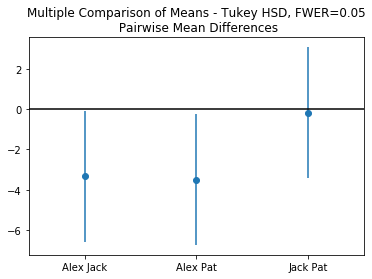

In [16]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['Score'], data['Archer'])
errors = np.ravel(np.diff(res2.confint)/2) 

# Plot them
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
labels = []
for p_l in pair_labels:
    labels.append(p_l[0]+' '+p_l[1])
plt.xticks(xvals, labels)

# Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()

Wizualizacja $95\%$ przedziałów ufności wzmacnia wyniki w sposób wizualny.